In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.optimize import minimize

# Taller Final

por:

- Pinzón, Angela
- Yañez, Andrés

## Punto 1.
Del artı́culo *ALM for insurers with multiple underwriting lines andportfolio constraints: a Lagrangian duality approach*, replique la solución numérica del **ejemplo 2**. Para tal caso, primero construya las gráficas presentadas en el ejemplo y luego halle las soluciones. Ayuda: Construya la función auxiliar $f (κ) = h1 (κ) − h2 (κ)$ y encuentre la raı́z de esa función auxiliar.

### Intentos
Con parametros de $\eta$ son $0.7$, $1.2$, $1.7$, y $2.2$.

#### Matriz

Este es un intento donde entendemos que la funcion retorna una matriz M, para cada función. Por el sistema de ecuaciónes que se deben solucionar, sin embargo no encontramos el vector resultante $b$ para solucionar el sistema.

In [ ]:
# Parámetros base
eta = 0.7
q1, q2 = 0.2, 0.6
mu, r = 0.07, 0.03
sigma = 0.21
lambda_ = 0.1
I_2x2 = np.eye(2)  # Matriz identidad 2x2

# Matrices
b = np.array([[0.2, 0.6], [1.3, 0.7]])  # b matriz 2x2
c = np.array([3.0, 3.0]).reshape(2, 1)  # c como un vector columna
p = np.array([0.7, 1.1]).reshape(2, 1)  # p como un vector columna
rho = np.array([0.4, 0.5])  # rho como un vector fila


def h1(kappa):
    term1 = p + (mu - r) / sigma * np.dot(b, rho.T)
    term2 = -eta * np.dot(np.dot(b, np.dot(np.eye(2) - np.dot(rho.T, rho), b.T)), kappa)
    additional_term = -lambda_ * (
        c * q1 / ((1 - kappa * c)**eta) +
        c * (1 - (q1 + q2)) / (1 - (kappa * c + kappa**2 * c**2))**eta
    )
    return term1 + term2 + additional_term

def h2(kappa):
    term1 = p**2 + (mu - r) / sigma * np.dot(b, rho.T)**2
    term2 = -eta * np.dot(np.dot(b, np.dot(np.eye(2) - np.dot(rho.T, rho), b.T)), kappa)**2
    additional_term = -lambda_ * (
        c**2 * q2 / ((1 - kappa**2 * c**2)**eta) +
        c**2 * (1 - (q1 + q2)) / (1 - (kappa * c + kappa**2 * c**2))**eta
    )
    return term1 + term2 + additional_term

kappa = np.array([0.1, 0.1])

print(f"h1= {h1(kappa)}")
print(f"h2= {h2(kappa)}")

h1= [[0.59924787 0.6644132 ]
 [0.99924787 1.0644132 ]]
h2= [[-0.31394491 -0.19932211]
 [ 0.40605509  0.52067789]]


#### ESCALAR

Este es un intento para graficar las funciones $h1(k)$ y $h2(k)$ retornando un escalar, sin embargo al ser un escalar las graficas no tienen el mismo comportamiento del paper, se ven completamente lineales

In [70]:
# Parámetros dados en tu código
eta = 0.7
q1, q2 = 0.2, 0.6
mu, r = 0.07, 0.03
sigma = 0.21
lambda_ = 0.1
I_2x2 = np.eye(2)  # Matriz identidad 2x2

# Matrices y vectores
b = np.array([[0.2, 0.6], [1.3, 0.7]])  # b matriz 2x2
c = np.array([3.0, 3.0])  # c como un vector
p = np.array([0.7, 1.1])  # p como un vector
rho = np.array([0.4, 0.5])  # rho como un vector fila

def h1(k):
    term1 = p[0] + (mu - r) / sigma * np.dot(b[0], rho)
    term2 = -eta * np.dot(np.dot(b[0], I_2x2 - np.outer(rho, rho)), b.T @ k)
    additional_term = -lambda_ * (
        c[0] * q1 / (1 - np.dot(k, c))**eta +
        c[0] * (1 - (q1 + q2)) / (1 - np.dot(k, c))**eta
    )
    return term1 + term2 + additional_term

def h2(k):
    term1 = p[1] + (mu - r) / sigma * np.dot(b[1], rho)
    term2 = -eta * np.dot(np.dot(b[1], I_2x2 - np.outer(rho, rho)), b.T @ k)
    additional_term = -lambda_ * (
        c[1] * q2 / (1 - np.dot(k, c))**eta +
        c[1] * (1 - (q1 + q2)) / (1 - np.dot(k, c))**eta
    )
    return term1 + term2 + additional_term

k = np.array([0.1, 0.1])  # vector de kappa inicial

# Evaluando las funciones h1 y h2 con el vector kappa inicial
h1_result = h1(k)
h2_result = h2(k)

h1_result, h2_result

(0.5021336145012402, 0.6858446099548614)

/tmp/ipykernel_34467/1379544171.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  c[0] * q1 / (1 - np.dot(k, c))**eta +
/tmp/ipykernel_34467/1379544171.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  c[0] * (1 - (q1 + q2)) / (1 - np.dot(k, c))**eta
/tmp/ipykernel_34467/1379544171.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  c[1] * q2 / (1 - np.dot(k, c))**eta +
/tmp/ipykernel_34467/1379544171.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  c[1] * (1 - (q1 + q2)) / (1 - np.dot(k, c))**eta
/tmp/ipykernel_34467/1379544171.py:24: RuntimeWarning: invalid value encountered in scalar power
  c[0] * q1 / (1 - np.dot(k, c))**eta +
/tmp/ipykernel_34467/1379544171.py:25: RuntimeWarning: invalid value encountered in scalar power
  c[0] * (1 - (q1 + q2)) / (1 - np.dot(k, c))**eta
/tmp/ipykernel_34467/1379544171.py:33: RuntimeWarning: invalid value encountered in scalar power
  c[1] * q2 / (1 - np.dot(k, c))**eta +


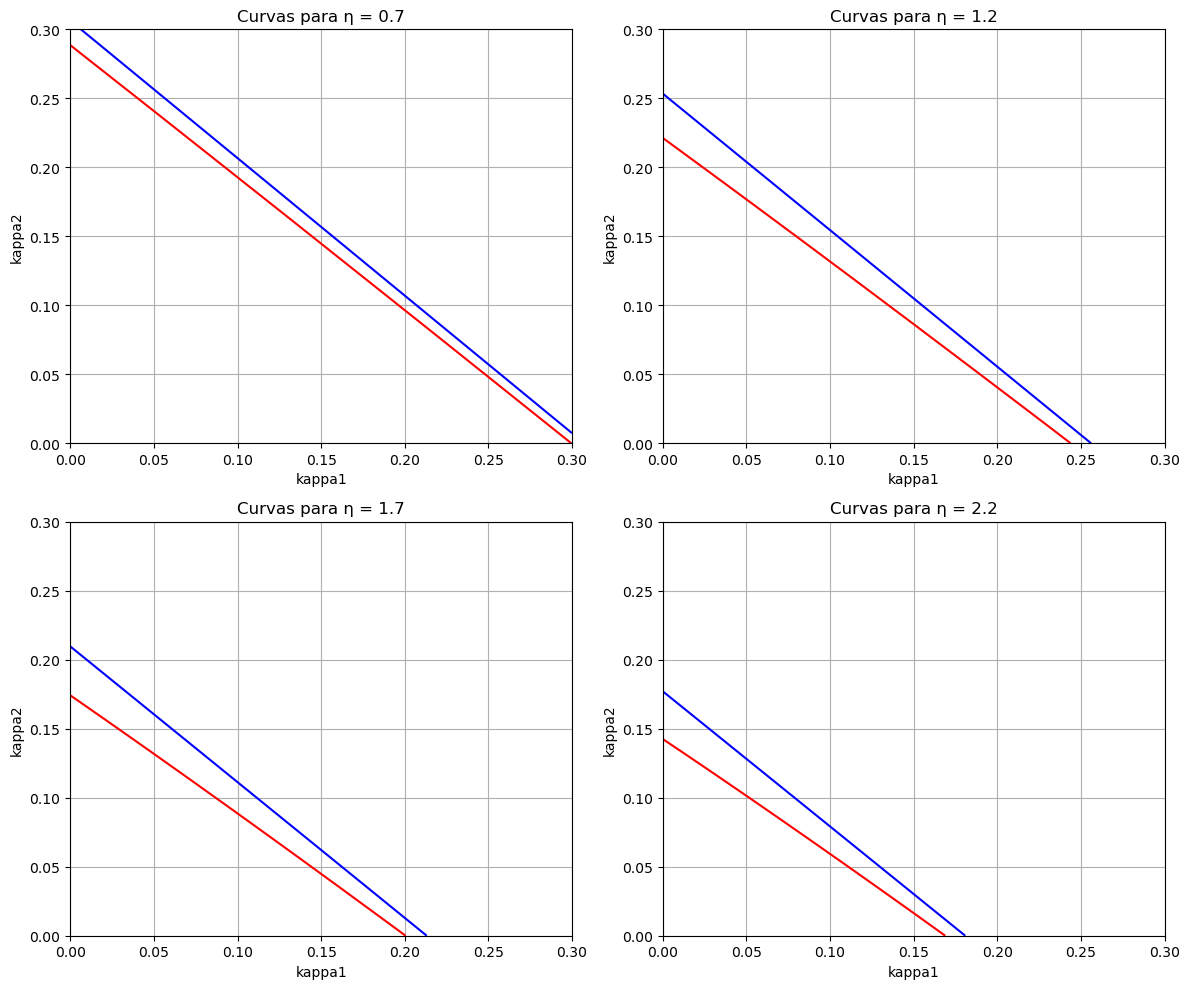

In [73]:
b = np.array([[0.2, 0.6], [1.3, 0.7]])
c = np.array([3.0, 3.0])
p = np.array([0.7, 1.1])
rho = np.array([0.4, 0.5])
q1 = 0.2
q2 = 0.6
mu = 0.07
sigma = 0.21
r = 0.03
lambda_=  0.1

kappa1_range = np.linspace(0, 0.3, 100)
kappa2_range = np.linspace(0, 0.3, 100)
K1, K2 = np.meshgrid(kappa1_range, kappa2_range)
H1_values = np.zeros_like(K1)
H2_values = np.zeros_like(K2)

# Función para calcular h1 y h2 con parámetro eta variable
def calculate_h_functions(eta):
    def h1(k):
        term1 = p[0] + (mu - r) / sigma * np.dot(b[0], rho)
        term2 = -eta * np.dot(np.dot(b[0], I_2x2 - np.outer(rho, rho)), b.T @ k)
        additional_term = -lambda_ * (
            c[0] * q1 / (1 - np.dot(k, c))**eta +
            c[0] * (1 - (q1 + q2)) / (1 - np.dot(k, c))**eta
        )
        return term1 + term2 + additional_term

    def h2(k):
        term1 = p[1] + (mu - r) / sigma * np.dot(b[1], rho)
        term2 = -eta * np.dot(np.dot(b[1], I_2x2 - np.outer(rho, rho)), b.T @ k)
        additional_term = -lambda_ * (
            c[1] * q2 / (1 - np.dot(k, c))**eta +
            c[1] * (1 - (q1 + q2)) / (1 - np.dot(k, c))**eta
        )
        return term1 + term2 + additional_term

    return h1, h2

# Lista de valores de eta
etas = [0.7, 1.2, 1.7, 2.2]

# Preparar las subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, eta in enumerate(etas):
    h1, h2 = calculate_h_functions(eta)
    H1_values = np.zeros_like(K1)
    H2_values = np.zeros_like(K2)
    
    for ix in range(len(kappa1_range)):
        for jx in range(len(kappa2_range)):
            kappa = np.array([K1[ix, jx], K2[ix, jx]])
            H1_values[ix, jx] = h1(kappa)
            H2_values[ix, jx] = h2(kappa)

    # Gráficos de las curvas de nivel para cada eta
    axes[i].contour(K1, K2, H1_values, levels=[0], colors='blue')
    axes[i].contour(K1, K2, H2_values, levels=[0], colors='red')
    axes[i].set_title(f'Curvas para η = {eta}')
    axes[i].set_xlabel('kappa1')
    axes[i].set_ylabel('kappa2')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Este es un intento por resolver el sistema usando una funcion de python

In [75]:
# Definir parámetros del modelo
mu = 0.07
sigma = 0.21
r = 0.03
rho = np.array([[1, 0.3], [0.3, 1]])
b = np.array([[0.2, 0.6], [1.3, 0.7]])
lambda_ = np.array([1.1, 0.1])
eta = 2
c = np.array([3.0, 3.0])
p = np.array([0.5, 0.4])
q = np.array([0.2, 0.7])

# Definir las ecuaciones h1(κ) y h2(κ)
def equations(kappa):
    kappa1, kappa2 = kappa
    h1 = (p[0] + (mu - r) / sigma * np.dot(b[:, 0], rho @ [kappa1, kappa2]) - eta * np.dot(b[:, 0], (np.eye(2) - rho @ rho) @ b @ [kappa1, kappa2]) - lambda_[0] * (c[0] * q[0] * (1 - kappa1 * c[0]) ** eta + c[0] * (1 - (q[0] + q[1])) * (1 - (kappa1 * c[0] + kappa2 * c[1])) ** eta))
    h2 = (p[1] + (mu - r) / sigma * np.dot(b[:, 1], rho @ [kappa1, kappa2]) - eta * np.dot(b[:, 1], (np.eye(2) - rho @ rho) @ b @ [kappa1, kappa2]) - lambda_[1] * (c[1] * q[1] * (1 - kappa2 * c[1]) ** eta + c[1] * (1 - (q[0] + q[1])) * (1 - (kappa1 * c[0] + kappa2 * c[1])) ** eta))
    return [h1, h2]

# Resolver las ecuaciones para encontrar κ1 y κ2
kappa_initial_guess = [0.1, 0.1]
kappa_optimal = fsolve(equations, kappa_initial_guess)

# Calcular la proporción de la cartera óptima π
pi_optimal = (1 / eta) * np.linalg.inv(sigma * sigma * np.eye(2)) @ (mu - r * np.ones(2)) + np.linalg.inv(sigma * np.eye(2)) @ rho @ b @ kappa_optimal

# Mostrar resultados
print("κ óptimo:", kappa_optimal)
print("π óptimo:", pi_optimal)

κ óptimo: [ 0.16430382 -0.14059879]
π óptimo: [0.37282062 0.92840171]


El ultimo intento es reescribir con otros simbolos de numpy, junto con usar la funcion auxiliar como un vector de $h^{j}(k)$ yse logra mostrar el cambio de solucion acuerdo a los parametros 

/tmp/ipykernel_34467/1006624961.py:26: RuntimeWarning: invalid value encountered in scalar power
  term3 = _lambda[1] * (c[1] * 0.3 / (1 - kappa[1] * c[1])**eta + c[1] * 0.1 / (1 - (kappa[0] * c[0] + kappa[1] * c[1]))**eta)
/tmp/ipykernel_34467/1006624961.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  term3 = _lambda[0] * (c[0] * 0.2 / (1 - kappa[0] * c[0])**eta + c[0] * 0.1 / (1 - (kappa[0] * c[0] + kappa[1] * c[1]))**eta)
/tmp/ipykernel_34467/1006624961.py:20: RuntimeWarning: invalid value encountered in scalar power
  term3 = _lambda[0] * (c[0] * 0.2 / (1 - kappa[0] * c[0])**eta + c[0] * 0.1 / (1 - (kappa[0] * c[0] + kappa[1] * c[1]))**eta)
/tmp/ipykernel_34467/1006624961.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  term3 = _lambda[1] * (c[1] * 0.3 / (1 - kappa[1] * c[1])**eta + c[1] * 0.1 / (1 - (kappa[0] * c[0] + kappa[1] * c[1]))**eta)
/tmp/ipykernel_34467/1006624961.py:49: UserWarning: The following kwargs were not used by contour: '

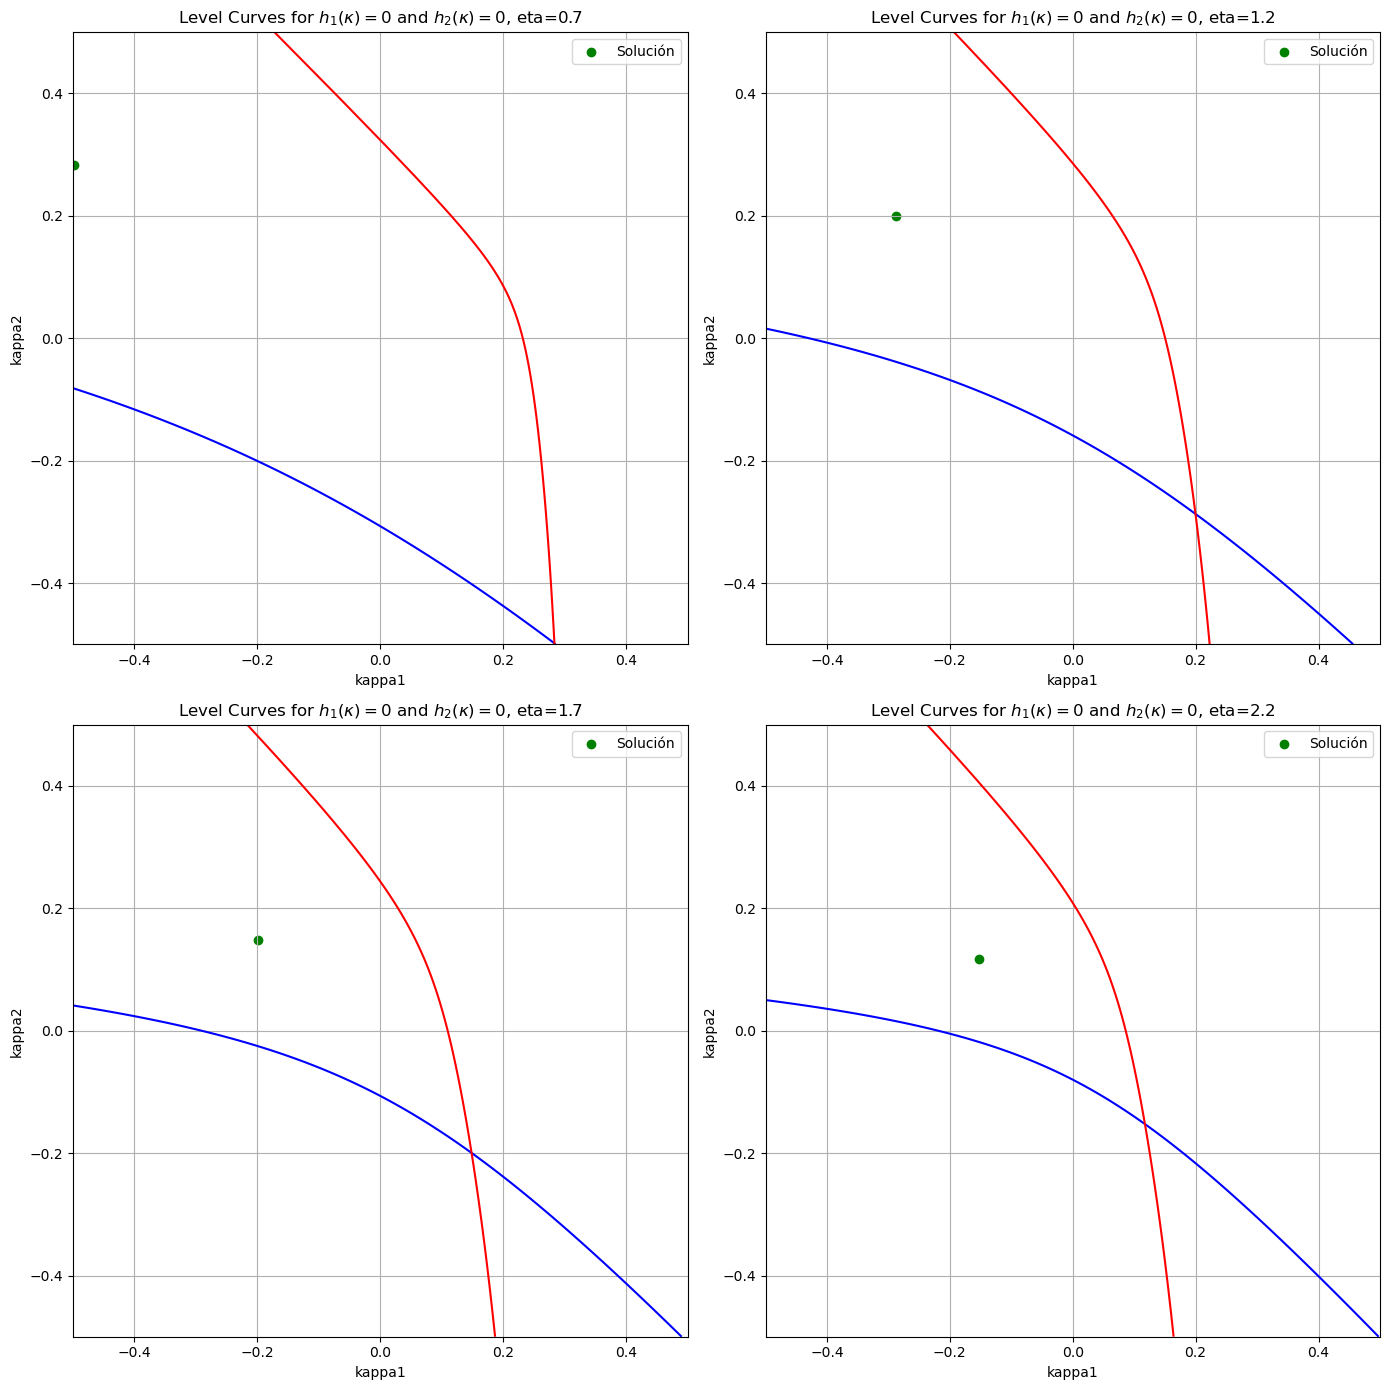

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parámetros
mu = 0.07
sigma = 0.21
r = 0.03
c = np.array([3.0, 3.0])
p = np.array([0.5, 0.4])
rho = np.array([0.3, 0.5])
_lambda = np.array([1.1, 0.1])
b = np.array([[0.2, 0.6], [1.3, 0.7]])
etas = [0.7, 1.2, 1.7, 2.2]

# Funciones h1 y h2
def h1(kappa, eta):
    term1 = p[0] + (mu - r) / sigma * (b @ rho)[0]
    term2 = eta * (b @ (np.eye(2) - np.outer(rho, rho)) @ b.T @ kappa)[0]
    term3 = _lambda[0] * (c[0] * 0.2 / (1 - kappa[0] * c[0])**eta + c[0] * 0.1 / (1 - (kappa[0] * c[0] + kappa[1] * c[1]))**eta)
    return term1 - term2 - term3

def h2(kappa, eta):
    term1 = p[1] + (mu - r) / sigma * (b @ rho)[1]
    term2 = eta * (b @ (np.eye(2) - np.outer(rho, rho)) @ b.T @ kappa)[1]
    term3 = _lambda[1] * (c[1] * 0.3 / (1 - kappa[1] * c[1])**eta + c[1] * 0.1 / (1 - (kappa[0] * c[0] + kappa[1] * c[1]))**eta)
    return term1 - term2 - term3

# Función auxiliar f(kappa)
def f_aux(kappa, eta):
    return np.array([h1(kappa, eta), h2(kappa, eta)])

# Preparar subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

for i, eta in enumerate(etas):
    kappa_initial = np.array([0.1, 0.1])
    kappa_solution = fsolve(f_aux, kappa_initial, args=(eta))
    
    kappa1_vals = np.linspace(-0.5, 0.5, 400)
    kappa2_vals = np.linspace(-0.5, 0.5, 400)
    h1_vals = np.array([h1([k1, k2], eta) for k1 in kappa1_vals for k2 in kappa2_vals])
    h2_vals = np.array([h2([k1, k2], eta) for k1 in kappa1_vals for k2 in kappa2_vals])

    h1_vals = h1_vals.reshape((400, 400))
    h2_vals = h2_vals.reshape((400, 400))
    
    ax = axs[i // 2, i % 2]
    ax.contour(kappa1_vals, kappa2_vals, h1_vals, levels=[0], colors='blue', label='h1(kappa) = 0')
    ax.contour(kappa1_vals, kappa2_vals, h2_vals, levels=[0], colors='red', label='h2(kappa) = 0')
    ax.scatter(kappa_solution[0], kappa_solution[1], color='green', label='Solución')
    ax.set_title(f'Level Curves for $h_1(\\kappa) = 0$ and $h_2(\\kappa) = 0$, eta={eta}')
    ax.set_xlabel('kappa1')
    ax.set_ylabel('kappa2')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


# Punto 2.
A partir de las diapositivas UR Finanzas Presenta replique la aproximación numérica al máximo de Q(n, θ) para los parámetros del Ejemplo I.


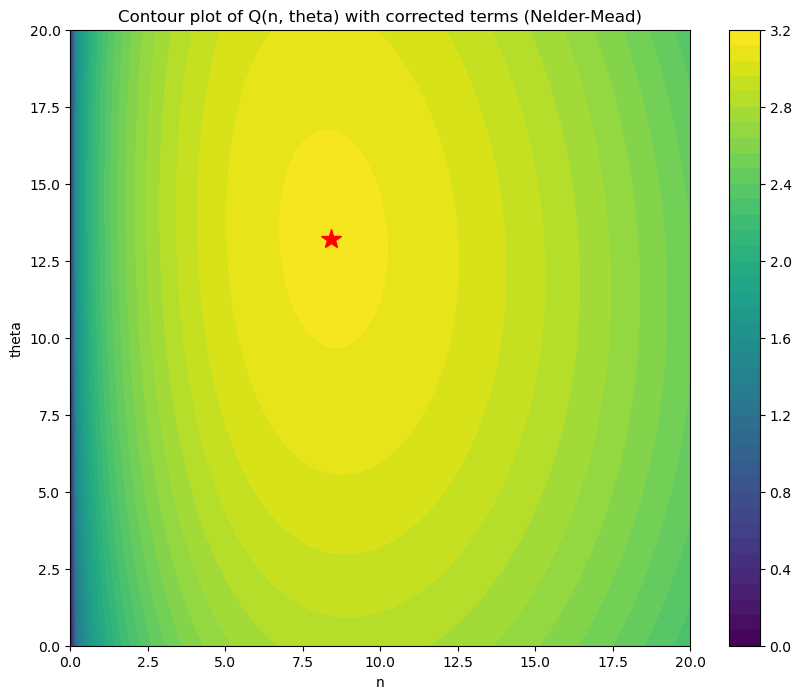

(8.413597658502313, 13.215447108041914)

In [115]:
# Parámetros del Ejemplo I
mu = 0.10
sigma = 0.20
R = 0.04
m1 = -0.15
b11 = 0.40
rho1 = 0.15
p1 = 0.50
eta = 2.00
A = 2.00
alpha = 0.30
lambda_val = 0.03

D = (R-m1)*p1 # Formula para D (Solucion para CARA)

# Función de producción F(n)
def F(n):
    return A * n**alpha

# Parámetro P
P = b11 * p1
# No se encontro mucha informacion de como se calcula P,  exepto P = [p**i B**ij]
# Por tanto asumimos que es el producto de b11 y p1 porque hablan de factores de produccion de dimension 1
# En las pruebas dan una buena aproximacion


# Función Q(n, theta) a maximizar con la corrección de D
def Q(params):
    n, theta = params
    term1 = F(n) - n * D + theta * (mu - R)
    term2 = (R * eta / 2) * (P**2 * n**2 + theta**2 * sigma**2 + 2 * theta * sigma * n * P * rho1)
    term3 = (lambda_val / (R * eta)) * (np.exp(-R * eta * (n * (-0.15) + theta * (-0.3))) - 1)
    return -(term1 - term2 - term3)


# Optimización usando el método de Simplex llamado Nelder-Mead
initial_guess = [1, 1]
bounds = [(0, None), (0, None)]
result_corrected_nm = minimize(Q, initial_guess, bounds=bounds, method='Nelder-Mead')

# Resultados óptimos corregidos
n_opt_corrected_nm, theta_opt_corrected_nm = result_corrected_nm.x

# Visualización de Q(n, theta) con los parámetros corregidos
n_vals = np.linspace(0, 20, 100)
theta_vals = np.linspace(0, 20, 100)
N, Theta = np.meshgrid(n_vals, theta_vals)
Q_vals_corrected_nm = np.array([Q([n, theta]) for n, theta in zip(np.ravel(N), np.ravel(Theta))])
Q_vals_corrected_nm = Q_vals_corrected_nm.reshape(N.shape)

plt.figure(figsize=(10, 8))
cp = plt.contourf(N, Theta, -Q_vals_corrected_nm, levels=50)
plt.colorbar(cp)
plt.xlabel('n')
plt.ylabel('theta')
plt.title('Contour plot of Q(n, theta) with corrected terms (Nelder-Mead)')
plt.plot(n_opt_corrected_nm, theta_opt_corrected_nm, 'r*', markersize=15)
plt.show()

n_opt_corrected_nm, theta_opt_corrected_nm

A pesar de seguir el ejemplo de la diapositiva hay un pequeño error respecto a los valores de la diapositiva:

In [114]:
# Valores óptimos teóricos
n_teorico = 8.6603
theta_teorico = 13.36788

# Valores óptimos obtenidos
n_obtenido = n_opt_corrected_nm
theta_obtenido = theta_opt_corrected_nm

# Cálculo del error
error_n = abs(n_teorico - n_obtenido)
error_theta = abs(theta_teorico - theta_obtenido)

print(f"n_error = {error_n} y theta_error = {error_theta}")


n_error = 0.2467023414976861 y theta_error = 0.1524328919580853


# Punto 3.

Del artículo Finite-Difference Methos for Continuous-Time Dynamic Programming replique la figura 4.

**Definición de Parámetros:**
Primero, ajustamos los parámetros necesarios para la simulación. Específicamente, definimos la constante 𝑎 que representa la velocidad de advección, el tamaño del dominio espacial 𝐿, el número de puntos en la malla espacial 𝑁𝑥, el tiempo total de simulación 𝑇 y el paso de tiempo 𝑑𝑡. También se estableció el número de pasos de tiempo que se utilizarán en la simulación.

**Condición Inicial:**
Para la condición inicial, utilizamos una función exponencial de la forma 
$exp(−100𝑘^2)$. Este tipo de función es comúnmente utilizada en problemas de ondas debido a su capacidad para representar una distribución inicial localizada y suave.

**Métodos de Diferencias Finitas:**
Implementamos tres métodos de diferencias finitas para aproximar las derivadas espaciales en la ecuación de advección. Estos métodos son:

Diferencias Foward: Calcula la derivada utilizando el valor del punto actual y el siguiente.

Diferencias Backward: Calcula la derivada utilizando el valor del punto actual y el anterior.

Diferencias Central: Calcula la derivada utilizando el valor del punto anterior y el siguiente, proporcionando una aproximación más simétrica.

**Solución de la EDP:**
Para resolver la ecuación diferencial parcial de advección $𝑉_𝑡+𝑎𝑉_𝑘=0$, utilizamos cada uno de los métodos de diferencias finitas mencionados. La solución se obtuvo aplicando iterativamente los métodos numéricos durante 5 pasos de tiempo. Esto me permitió observar cómo evolucionaba la onda en el tiempo utilizando cada método.


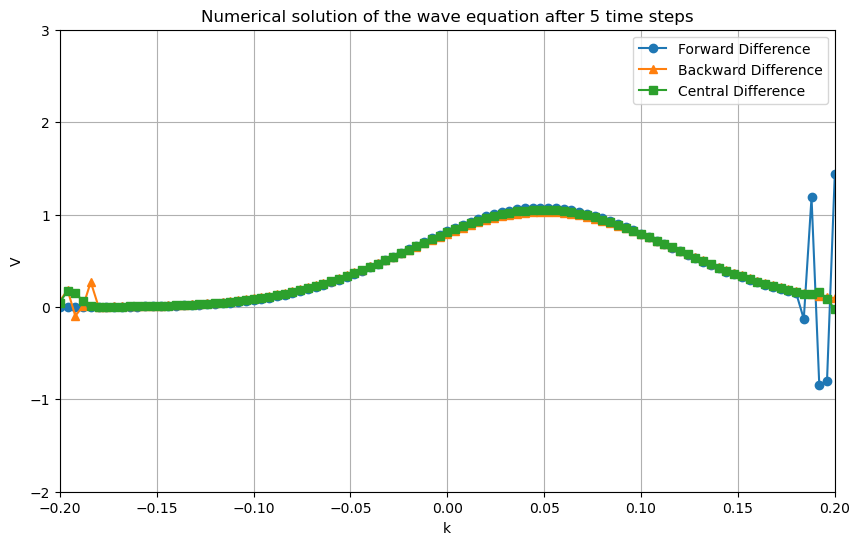

In [104]:
# Parámetros
a = 1.0
L = 1.0
Nx = 101
T = 0.1
dt = 0.01
steps = 5

k = np.linspace(-0.2, 0.2, Nx)
dx = k[1] - k[0]

# Condición inicial
def initial_condition(k):
    return np.exp(-100 * k**2)

def forward_difference(V, dx):
    return (np.roll(V, -1) - V) / dx

def backward_difference(V, dx):
    return (V - np.roll(V, 1)) / dx

def central_difference(V, dx):
    return (np.roll(V, -1) - np.roll(V, 1)) / (2 * dx)

def solve_wave_equation(method, k, a, dx, dt, steps):
    V = initial_condition(k)
    for _ in range(steps):
        if method == 'forward':
            V = V - a * dt * forward_difference(V, dx)
        elif method == 'backward':
            V = V - a * dt * backward_difference(V, dx)
        elif method == 'central':
            V = V - a * dt * central_difference(V, dx)
    return V

V_forward = solve_wave_equation('forward', k, a, dx, dt, steps)
V_backward = solve_wave_equation('backward', k, a, dx, dt, steps)
V_central = solve_wave_equation('central', k, a, dx, dt, steps)

plt.figure(figsize=(10, 6))
plt.plot(k, V_forward, 'o-', label='Forward Difference')
plt.plot(k, V_backward, '^-', label='Backward Difference')
plt.plot(k, V_central, 's-', label='Central Difference')
plt.xlabel('k')
plt.ylabel('V')
plt.title('Numerical solution of the wave equation after 5 time steps')
plt.legend()
plt.grid(True)
plt.ylim([-2, 3])
plt.xlim([-0.2, 0.2])
plt.show()

# Parte 4.

Construya un programa en Python que calcule $$ \int_{-\inf}^{x} \frac{1}{\sqrt{2\pi}}e^{\frac{-y²}{2}}dy$$
para un valor de x dado. Pruebe su programa con los siguientes valores y compare con un paquete de Python.
1. x = −1.96 
2. x = 0 
3. x = 0.5


In [101]:
def func_1(y):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-y**2 / 2)

# Método de integración usando la regla de Simpson 3/8
def simpson38_integration(f, a, b, n):
    xi = np.linspace(a, b, n)
    h = (b - a) / (n - 1)
    integral = 0
    for i in range(0, n-3, 3):
        integral += (3/8) * h * (f(xi[i]) + 3*f(xi[i+1]) + 3*f(xi[i+2]) + f(xi[i+3]))
    return integral

# Valores de x para probar
x_values = [-1.96, 0, 0.5]

# Cálculo de la integral y comparación con scipy.integrate.quad
for x in x_values:
    integral_value = simpson38_integration(func_1, -10, x, 1000)
    quad_value, _ = quad(func_1, -np.inf, x)
    print(f"Para x = {x}:")
    print(f"  Valor aproximado de la integral (Simpson 3/8): {integral_value}")
    print(f"  Valor con scipy.integrate.quad: {quad_value}")
    print(f"  Diferencia: {abs(integral_value - quad_value)}")

Para x = -1.96:
  Valor aproximado de la integral (Simpson 3/8): 0.024997895153276516
  Valor con scipy.integrate.quad: 0.024997895148216577
  Diferencia: 5.059938579243806e-12
Para x = 0:
  Valor aproximado de la integral (Simpson 3/8): 0.5000000000000001
  Valor con scipy.integrate.quad: 0.49999999999999983
  Diferencia: 2.7755575615628914e-16
Para x = 0.5:
  Valor aproximado de la integral (Simpson 3/8): 0.691462461347869
  Valor con scipy.integrate.quad: 0.6914624612740132
  Diferencia: 7.385581035634914e-11


/tmp/ipykernel_34467/1541708355.py:9: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0
  integral_vals = cumtrapz(y_vals, x_vals, initial=0)


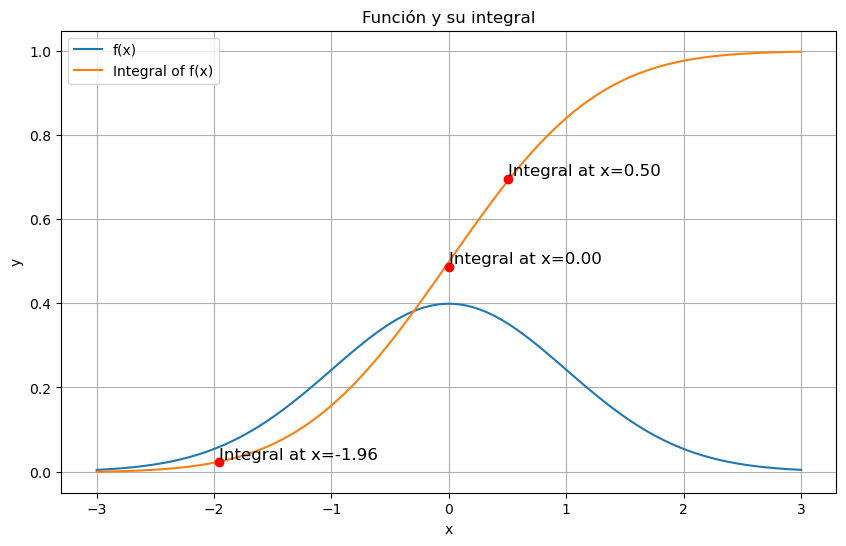

In [100]:
from scipy.integrate import cumtrapz
x_values = [-1.96, 0, 0.5]
x_vals = np.linspace(-3, 3, 100)
y_vals = func_1(x_vals)

integral_vals = cumtrapz(y_vals, x_vals, initial=0)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.plot(x_vals, integral_vals, label="Integral of f(x)")

for x in x_values:
    integral_approx = integral_vals[np.abs(x_vals - x).argmin()]
    plt.plot(x, integral_approx, 'ro')
    plt.text(x, integral_approx, f'Integral at x={x:.2f}', fontsize=12, verticalalignment='bottom')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Función y su integral')
plt.legend()
plt.grid(True)
plt.show()